In [1]:
import os
import pandas as pd
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from utils.filemanagement import load_from_file
from utils.filemanagement import get_project_root


In [2]:
model_type="bertopic"
model_name="BERTopic"
embedding_model = "preliminary"
data_type="np_mini_basic"
file_name_data = f"{data_type}.csv"
file_name = f"{model_type}_{embedding_model}_{data_type}"

folder_path_data =f"preprocessed_data"
df = load_from_file(folder_path_data,file_name_data)
TOPN = 20

folder_path_word_cloud = f"preprocessed_data/wordclouds/preliminary/{file_name}"

random_sample = False
seed = 42

folder_name = f"Preliminary-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


In [3]:
data = df.text.values.tolist()
timestamps = df.date.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
topic_model = BERTopic()
try:
    topic_model = topic_model.load(file_path)
except:
    topics,probs = topic_model.fit_transform(documents=new_data)

In [5]:
topic_model.get_topic_info()

Topic  Count                                          Name
0      -1   1762                               -1_det_er_og_at
1       0    561                               0_det_er_som_at
2       1    213                               1_det_er_at_som
3       2    117                              2_barn_er_og_det
4       3     87                               3_det_er_og_som
5       4     73              4_vegne_meg_representantene_selv
6       5     71                               5_er_og_det_til
7       6     70                               6_og_er_for_det
8       7     61                               7_av_til_at_for
9       8     55                               8_og_det_en_til
10      9     55             9_statsrden_sprsml_flgende_stille
11     10     44                               10_det_kr_og_er
12     11     41                               11_at_kr_for_og
13     12     37                 12_finansministeren_at_det_er
14     13     32                              13_for_og_at_til
15     14     32                              14_og_av_for_til
16     15     30                       15_statsrden_og_jeg_man
17     16     29                               16_det_og_er_vi
18     17     25                              17_det_er_vi_fly
19     18     24                 18_statsministeren_at_for_det
20     19     20                        19_jeg_det_er_sprsmlet
21     20     19                       20_afghanistan_og_er_vi
22     21     18                             21_nato_usa_vi_at
23     22     15    22_presidenten_president_jeg_spanskekongen
24     23     15                              23_og_av_dei_til
25     24     15                              24_det_at_man_vi
26     25     14                              25_at_og_til_det
27     26     14                           26_tvang_for_av_som
28     27     13               27_barentshavet_bedrifter_er_og
29     28     13                 28_stemme_forslag_stemmer_kap
30     29     13  29_forslaget_kommer_oversendelsesforslag_vil
31     30     12                  30_russland_russiske_eit_har

In [6]:
topics = topic_model.get_topics()

In [7]:
topic_model.visualize_topics()

In [8]:
topic_model.save(file_path)

In [9]:
topic_model.embedding_model

In [10]:
topics

{-1: [('det', 0.023376876777608333),
  ('er', 0.022032406368471848),
  ('og', 0.021670847786427586),
  ('at', 0.020850510006286564),
  ('som', 0.020178314513338375),
  ('for', 0.018894967756010746),
  ('til', 0.01877571572941152),
  ('har', 0.017888331476528012),
  ('en', 0.0175709066603661),
  ('vi', 0.016907240356810245)],
 0: [('det', 0.02653314619768756),
  ('er', 0.02366455816750619),
  ('som', 0.021963163707487455),
  ('at', 0.02191075659088504),
  ('og', 0.02052869239458591),
  ('vi', 0.01954401913482234),
  ('har', 0.01916260737167176),
  ('til', 0.018293013120180814),
  ('jeg', 0.016703471959833682),
  ('for', 0.016159401269586645)],
 1: [('det', 0.024611889257877353),
  ('er', 0.022046256073739414),
  ('at', 0.02193390848739494),
  ('som', 0.02034145603305339),
  ('og', 0.020307313460812125),
  ('har', 0.019358189884907298),
  ('for', 0.019323443334285227),
  ('vi', 0.019044961147675406),
  ('til', 0.01839777030869155),
  ('med', 0.01630133208126368)],
 2: [('barn', 0.0359747

In [11]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [12]:
reck = [dict(topics[i]) for i in range(NUM_TOPICS)]

In [13]:
print(reck)

[{'det': 0.02653314619768756, 'er': 0.02366455816750619, 'som': 0.021963163707487455, 'at': 0.02191075659088504, 'og': 0.02052869239458591, 'vi': 0.01954401913482234, 'har': 0.01916260737167176, 'til': 0.018293013120180814, 'jeg': 0.016703471959833682, 'for': 0.016159401269586645}, {'det': 0.024611889257877353, 'er': 0.022046256073739414, 'at': 0.02193390848739494, 'som': 0.02034145603305339, 'og': 0.020307313460812125, 'har': 0.019358189884907298, 'for': 0.019323443334285227, 'vi': 0.019044961147675406, 'til': 0.01839777030869155, 'med': 0.01630133208126368}, {'barn': 0.0359747065986159, 'er': 0.02321494475307755, 'og': 0.022961384813796355, 'det': 0.022522275608725783, 'for': 0.02213238775774128, 'at': 0.02193476539628566, 'som': 0.02149417435600994, 'til': 0.019935763517570433, 'har': 0.018631605875230457, 'de': 0.017941827291379293}, {'det': 0.025150957510785873, 'er': 0.02383071586917954, 'og': 0.021889019107827312, 'som': 0.020324505714942463, 'at': 0.019935037301612474, 'store':

In [14]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [15]:
formatted_topics = [dict(topics[i]) for i in range(NUM_TOPICS)]

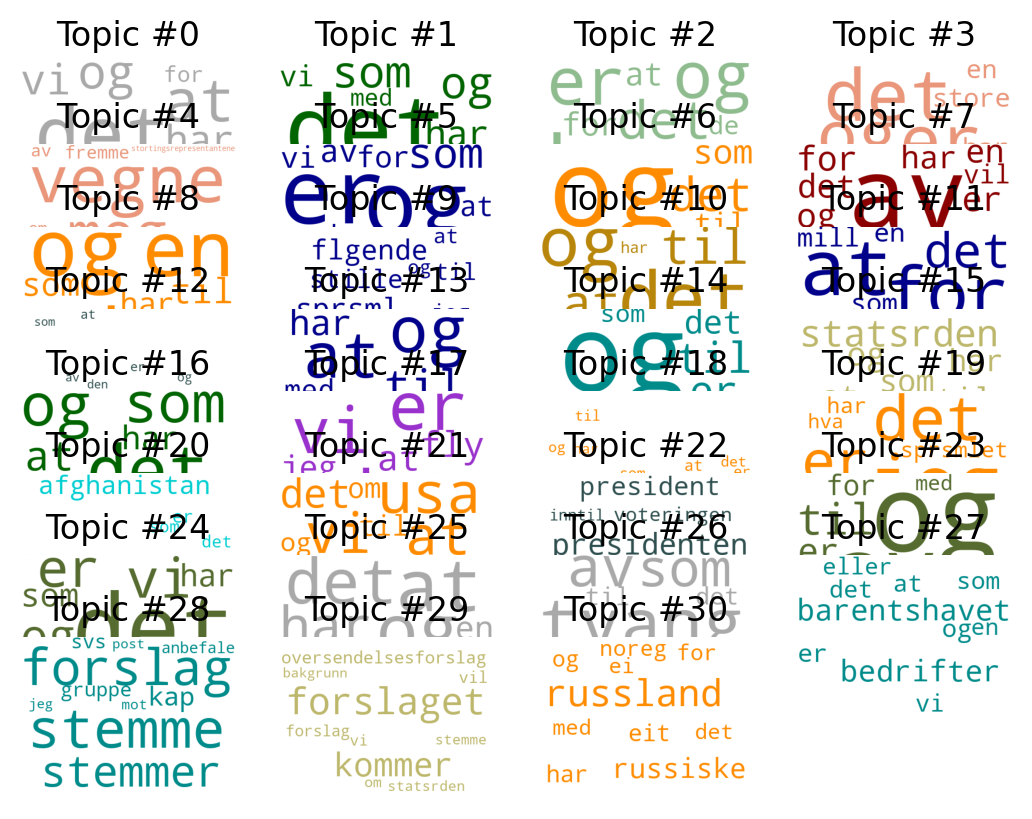

In [16]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(reck, f"{model_name}-{embedding_model}: {data_type}", NUM_TOPICS, dpi=200)

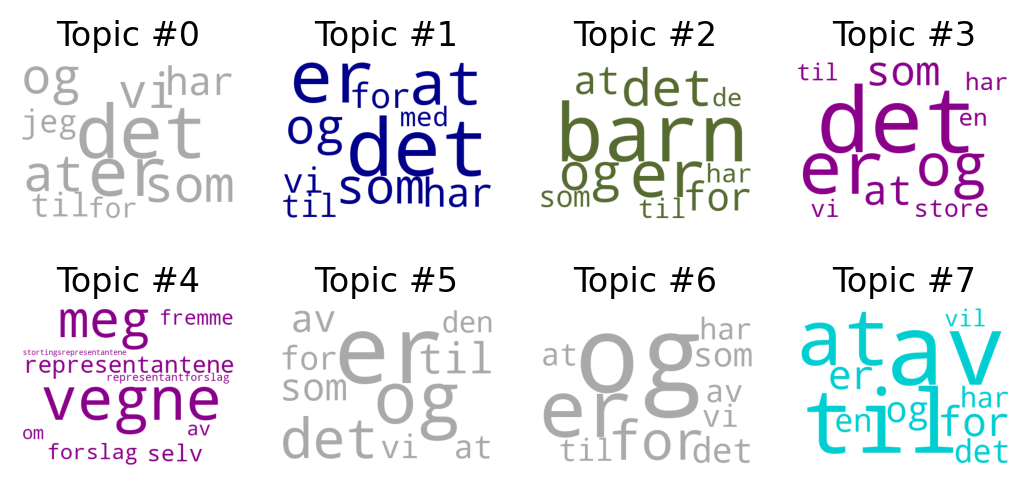

In [17]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [18]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(topics[i]))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [19]:
from utils.filemanagement import write_topics_file
topic_words_numbered = []
for i, key in enumerate(topics.keys()):
    if key == -1:
        continue
    r = topics[key]
    rr = []
    for item in r:
        rr.append(item[0])
    topic_words_numbered.append((i,rr))
folder_path_topics = r"preprocessed_data/results"


write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [20]:
from utils.filemanagement import load_model_topics

folder_path_topics = r"preprocessed_data/results"

loaded_topics = load_model_topics(folder_path_topics, file_name)


In [21]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [22]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [23]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [24]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('det', 'er') wordtuple
('det', 'er') wordup
760502.0 over
1431151092.0 under
-10.877936328378098 -19.536592516451392 0.5567980352365949 ('det', 'er') 760502 42609 33588
('det', 'som') wordtuple
('det', 'som') wordup
555039.0 over
1051504902.0 under
-10.887578808848744 -19.082229620908212 0.5705611464249088 ('det', 'som') 555039 42609 24678
('at', 'det') wordtuple
('at', 'det') wordup
582275.0 over
1158283056.0 under
-10.957999557348646 -19.151341152370996 0.5721792259959826 ('at', 'det') 582275 42609 27184
('det', 'og') wordtuple
('det', 'og') wordup
678768.0 over
1309246743.0 under
-10.913530843637481 -19.372559026162516 0.5633499853529329 ('det', 'og') 678768 42609 30727
('det', 'vi') wordtuple
('det', 'vi') wordup
376537.0 over
688007523.0 under
-10.835416988059718 -18.52243211116344 0.584988889311638 ('det', 'vi') 376537 42609 16147
('det', 'har') wordtuple
('det', 'har') wordup
381993.0 over
756096705.0 under
-10.950808850848237 -18.54318667563549 0.5905570084799324 ('det', 'h

In [25]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.015628245034320535


In [26]:
print(diversity)

0.26129032258064516


In [27]:
print(coherence)

0.7727578148615911


In [28]:
from tabulate import tabulate
import csv

In [29]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒════════════════════════════════════╤═══════════╤══════════╕
│ Model                              │ Metric    │    Value │
╞════════════════════════════════════╪═══════════╪══════════╡
│ bertopic_preliminary_np_mini_basic │ coherence │ 0.772758 │
├────────────────────────────────────┼───────────┼──────────┤
│ bertopic_preliminary_np_mini_basic │ diversity │ 0.26129  │
╘════════════════════════════════════╧═══════════╧══════════╛


In [30]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})